In [1]:
import os
import cv2
import torch
import numpy as np
import rosbag
import matplotlib.pyplot as plt
import custom_utils.data_conversion as data_conversion

DATAFILE = "/scratchdata/stationary"
FRAME_INDEX = 0
SQUARE_SIZE = 25 #mm

# Open bag file
bag_file_path = os.path.join(DATAFILE, "raw.bag")
bag = rosbag.Bag(bag_file_path)

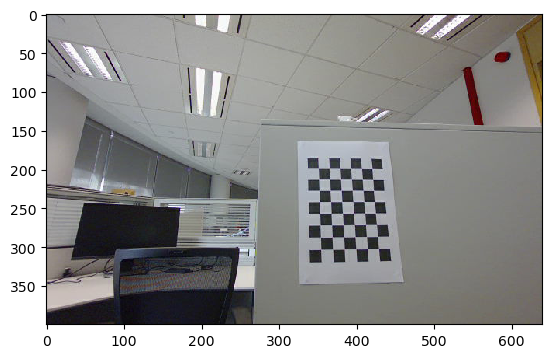

In [2]:
wait = 0
for topic, msg, t in bag.read_messages(topics=["/camera/color/image_raw"]):
    if wait == FRAME_INDEX:
        img = data_conversion.topic_to_image(msg)
        break
    wait += 1

plt.imshow(img)
plt.imsave(os.path.join(DATAFILE, "color.png"), img)

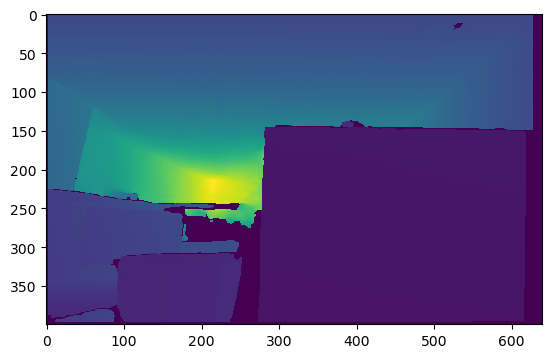

In [3]:
wait = 0

for topic, msg, t in bag.read_messages(topics=["/camera/depth/image_raw"]):
    wait += 1
    if wait == 10:
        depth = data_conversion.topic_to_depth(msg)
        break

plt.imshow(depth)

In [19]:
for topic, msg, t in bag.read_messages(topics=["/camera/color/camera_info"]):
    print(msg)
    D = np.array(msg.D)
    K = np.array(msg.K).reshape((3, 3))
    P = np.array(msg.P).reshape((3, 4))
    R = np.array(msg.R).reshape((3, 3))
    height = msg.height
    width = msg.width
    distortion_model = msg.distortion_model
    break

header: 
  seq: 738
  stamp: 
    secs: 1724060625
    nsecs: 704971008
  frame_id: "camera_color_optical_frame"
height: 400
width: 640
distortion_model: "rational_polynomial"
D: [-1.0684188604354858, 0.5052042007446289, 0.0006109976093284786, -0.0002675213327165693, -0.056596025824546814, -1.049520492553711, 0.4790358245372772, -0.04655176028609276]
K: [305.6186218261719, 0.0, 314.30413818359375, 0.0, 305.7062072753906, 197.7598876953125, 0.0, 0.0, 1.0]
R: [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
P: [305.6186218261719, 0.0, 314.30413818359375, 0.0, 0.0, 305.7062072753906, 197.7598876953125, 0.0, 0.0, 0.0, 1.0, 0.0]
binning_x: 0
binning_y: 0
roi: 
  x_offset: 0
  y_offset: 0
  height: 0
  width: 0
  do_rectify: False


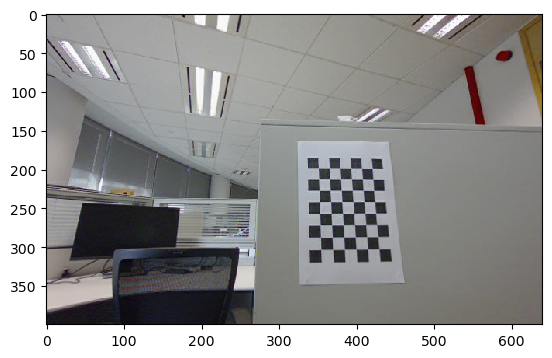

In [20]:
# Undistort image
img_undistorted = cv2.undistort(img, K, D, P)

plt.imshow(img_undistorted)

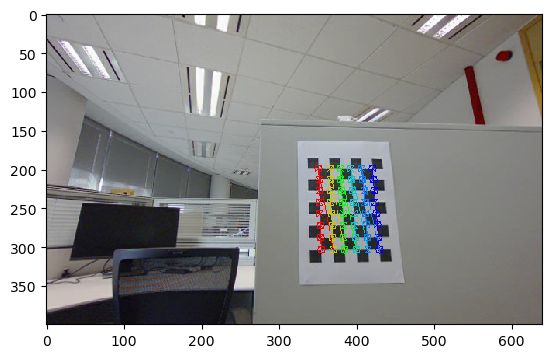

In [21]:
#Estimate distance of checkerboard
# Load camera matrix
camera_matrix = K
distortion_coefficients = D
CHECKERBOARD = (8,6)
ret, corners = cv2.findChessboardCorners(
    img_undistorted, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH)
if ret:
    fnl = cv2.drawChessboardCorners(np.float32(img_undistorted/255.0), CHECKERBOARD, corners, ret)
    plt.imshow(fnl)
else:
    print("No Checkerboard Found")
    plt.imshow(res)


In [ ]:
# Calculate distance of checkerboard from camera
# Get the center of the checkerboard
center = np.mean(corners, axis=0)

 

In [9]:
corners_depth = data_conversion.interpolate_depth(depth,corners.reshape(-1, 2))
print(corners_depth)

[0.55840177 0.556641   0.55462272 0.55312734 0.55163195 0.54983749
 0.54802395 0.54603157 0.55791257 0.55615094 0.55421785 0.55256987
 0.5510338  0.54923934 0.5471458  0.54565042 0.55755759 0.55581903
 0.55375136 0.5523743  0.55073472 0.5485043  0.54654765 0.54490281
 0.55731441 0.55551995 0.55367054 0.55193103 0.55000256 0.5478473
 0.54594949 0.544588   0.55705373 0.55527864 0.55342641 0.55175072
 0.54953841 0.54785748 0.54619295 0.54447141 0.55671626 0.55522087
 0.55342641 0.55163195 0.54961316 0.54804303 0.54620531 0.54445411]
